In [ ]:
#### 55/55. Good job Sam. 

DATA 300: Statistical Machine Learning 

Due December 15th 11:59 EST 

Final (55 points) – Design choice and Time space complexity 

For this final, we will be fitting two classification models- Support Vector Machines (SVMs) and a Random Forest classifier on one dataset. We will tweak some parameters and compare the performance of models across parameters and how well they perform on the data. This is your chance to make some design choices on your models and how you work with data. Have fun with it! 

You can find the data here on the course website. A description of the dataset is available on the University of California Irvine(UCI) machine learning repository (here).  

Do some EDA on the dataset and report your findings. (3 points) 

If the dataset is imbalanced, under sample the data before you proceed. Save this data separately. 

Split the data into a training and testing set. 

For part 1 below use the original data 

Part 1 

Random Forest: 

Fit the model on the training set using the default parameters and report your findings.(5 points) 

Repeat 1 but change the parameters to different non-default parameters. Evaluate this model on your choice of metrics. Which model do you prefer? (5 points) 

Which model takes longer to fit? 1. Or 2.? Report the CPU time. (2 points) 

Based on your findings above which parameter combinations give you the best results for classification? Would you prefer “Gini” or “entropy” as your splitting metric? (5 points) 

Choose one of the models from number 1. Or number 2, display, and discuss the decision rules. Do the rules make sense for classification? (5 points) 

Which features are the most important for classification? (2 points) 

On average, what do you think is the tradeoff between model fitting time and model performance?  (3 points) 

Support Vector Machines: 

Fit the model on the training set using the default parameters and report your findings.(5 points) 

Change the kernel from “rbf” to “linear” and repeat the model fitting procedure in 1 above (5 point) 

Evaluate both models using any metrics of choice. (4 points) 

How long does it take to fit the SVM model in 1. above? How about 2. above? Report only the CPU times (1 point) 

Part 2- using the sampled data. 

Fit the Random Forest and the SVM on the undersampled data and compare the fitting times for both models? Which model takes longer to fit? (5 points) 

Compare the performance of both models on any metrics of choice. (5 points) 


In [1]:
import pandas as pd# v 1.5.3
import numpy as np # v 1.21.5
import sklearn as sk # v 1.3.2
import matplotlib.pyplot as plt # 3.6.3
import time
from sklearn.tree import plot_tree # v 1.3.2
from sklearn.tree import export_text # v 1.3.2
from sklearn.svm import SVC # v 1.3.2


from sklearn.model_selection import train_test_split # v 1.3.2

from sklearn.ensemble import RandomForestClassifier # v 1.3.2
from sklearn.metrics import accuracy_score, classification_report # v 1.3.2


In [2]:
df = pd.read_csv('/Users/samcampbell/Downloads/company_bankruptcy_data.csv')

In [3]:
df.shape, df.columns, df.dtypes #Checking out the shape of the df, columns, and data types


((6819, 96),
 Index(['Bankrupt', ' ROA(C) before interest and depreciation before interest',
        ' ROA(A) before interest and % after tax',
        ' ROA(B) before interest and depreciation after tax',
        ' Operating Gross Margin', ' Realized Sales Gross Margin',
        ' Operating Profit Rate', ' Pre-tax net Interest Rate',
        ' After-tax net Interest Rate',
        ' Non-industry income and expenditure/revenue',
        ' Continuous interest rate (after tax)', ' Operating Expense Rate',
        ' Research and development expense rate', ' Cash flow rate',
        ' Interest-bearing debt interest rate', ' Tax rate (A)',
        ' Net Value Per Share (B)', ' Net Value Per Share (A)',
        ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
        ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
        ' Operating Profit Per Share (Yuan ¥)',
        ' Per Share Net profit before tax (Yuan ¥)',
        ' Realized Sales Gross Profit Growth Rate

In [4]:
df.head() #Looking at the First 5 rows

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [5]:
df.tail() #Looking at the last 5 rows


,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009
6818,0,0.493053,0.570105,0.549548,0.627409,0.627409,0.998080,0.801987,0.813800,0.313415,...,0.815956,0.000707,0.626680,0.627408,0.841019,0.275114,0.026793,0.565167,1,0.233902


In [6]:
df.describe() #checking out some basic metrics

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [7]:
na = df.isna().sum() # There arent any missing vals
na.value_counts()

0    96
dtype: int64

In [8]:
df.Bankrupt.value_counts() # Inbalanced Classes

0    6599
1     220
Name: Bankrupt, dtype: int64

In [9]:
minorityDF = df[df.Bankrupt == 1] # splitting into minority class

In [10]:
majorityDF = df[df.Bankrupt == 0] # splitting into majority class

In [11]:
underSampleMajority = sk.utils.resample(majorityDF,n_samples=220)

In [12]:
underSample = pd.concat([underSampleMajority , minorityDF])

In [13]:
underSample.Bankrupt.value_counts() #balanced!

1    220
0    220
Name: Bankrupt, dtype: int64

In [14]:
y = df.Bankrupt

X = df.loc[:, df.columns != "Bankrupt"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Fit the model on the training set using the default parameters and report your findings.(5 points)

In [15]:


rf_classifier = RandomForestClassifier()


In [16]:
%%time
rf_classifier.fit(X_train, y_train)

CPU times: user 4.02 s, sys: 22.6 ms, total: 4.04 s
Wall time: 4.25 s


RandomForestClassifier()

In [17]:
y_pred = rf_classifier.predict(X_test)


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.83      0.20      0.32        51

    accuracy                           0.97      1364
   macro avg       0.90      0.60      0.65      1364
weighted avg       0.96      0.97      0.96      1364



Repeat 1 but change the parameters to different non-default parameters. Evaluate this model on your choice of metrics. Which model do you prefer? (5 points)

Based on your findings above which parameter combinations give you the best results for classification? Would you prefer “Gini” or “entropy” as your splitting metric? (5 points)

In [18]:
# my customized version
rf_classifier_custom = RandomForestClassifier(n_estimators=100, max_depth=9, min_samples_split=2, min_samples_leaf=1, criterion='entropy')


In [ ]:
#### Good job on the design choice above. 

In [19]:
%%time
rf_classifier_custom.fit(X_train, y_train)

CPU times: user 2.87 s, sys: 8.07 ms, total: 2.88 s
Wall time: 2.9 s


RandomForestClassifier(criterion='entropy', max_depth=9)

In [20]:
y_pred_custom = rf_classifier_custom.predict(X_test)

print(classification_report(y_test, y_pred_custom))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.86      0.12      0.21        51

    accuracy                           0.97      1364
   macro avg       0.91      0.56      0.59      1364
weighted avg       0.96      0.97      0.95      1364



Which model do you prefer? 

Simply based on the precision, recall, f1-score,and accuracy it appears that the default parameters performed better. It's predictive abilities for the class = 1 is better in recall and f1-score which I would perfer in a model that has inbalanced classes like our dataset. The accuracy scores are the same and the run time is similar for both models, but the default performed sligthly better in my case.

Which model takes longer to fit? 1. Or 2.? Report the CPU time. (2 points)

The CPU time for the default model is 3.07s and 3.09s for the customized model. About the same but the default model fits slightly faster.

Based on your findings above which parameter combinations give you the best results for classification? Would you prefer “Gini” or “entropy” as your splitting metric? (5 points) 

Based on my two models and parameter combinations I would say the default model works better, as the run times and accuracy scores are the same, and basiclly all metrics for class = 0 are similar. The deciding factor in my mind is the better recall and f1 score for the default model as mentioned in my answer above. Based off the better performance metrics for the underrepresented class I think the gini split method works better on this dataset (the default method).

Choose one of the models from number 1. Or number 2, display, and discuss the decision rules. Do the rules make sense for classification? (5 points)


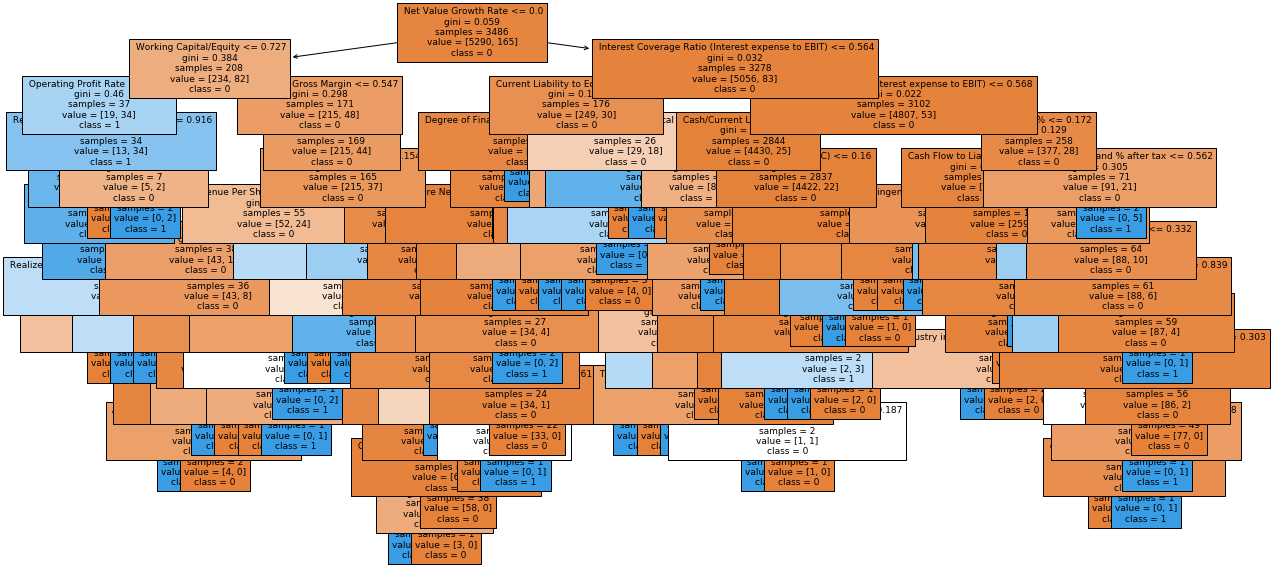

In [21]:

chosen_tree_index = 0

plt.figure(figsize=(20, 10))
plot_tree(rf_classifier.estimators_[chosen_tree_index], filled=True, feature_names=X_train.columns, class_names=['0', '1'], fontsize=9)
    
plt.show()

In [ ]:
#### The above plot is very well done.

In my opinion, the decision tree ruless make sense. I'm not a finance or banking expert but starting with the Retained Earnings to equity seems to make sense in terms of predicting for banktruptcy as earnings and assets and there ratio are neccessary to success in the industry. Then working into Debt Ratio, Interest Expense Ratio etc seem rational as well as they seem to give overarching information on the general health of the firm. These choices seem to make sense.

Which features are the most important for classification? (2 points)

The most important features are Borrowing dependency, Net Income to Stockholders Equity and Persistent EPS in the Last Four Seasons. 

In [22]:
feature_importances = rf_classifier.feature_importances_

feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                                     Feature  Importance
29                     Net Value Growth Rate    0.029996
18   Persistent EPS in the Last Four Seasons    0.026304
89        Net Income to Stockholder's Equity    0.025356
39                      Borrowing dependency    0.019695
91        Degree of Financial Leverage (DFL)    0.019495
..                                       ...         ...
40          Contingent liabilities/Net worth    0.004122
44                      Total Asset Turnover    0.003786
14                              Tax rate (A)    0.002210
84                     Liability-Assets Flag    0.000000
93                           Net Income Flag    0.000000

[95 rows x 2 columns]


On average, what do you think is the tradeoff between model fitting time and model performance?  (3 points) 

In my mind, the main tradeoff is practicality. A longer run time model in theory should perform better but in applications were classifications are time sensitive it would likely make sense to chose the faster model, even if it performs slightly slower. In terms of a classification problem like diagnosing a patient with cancer, the slower model is likely optimal as that choice should not be rushed and model performance is more important.

Fit the model on the training set using the default parameters and report your findings.(5 points) 

In [23]:
# SVM!
svm_classifier = SVC()

In [24]:
%%time
svm_classifier.fit(X_train, y_train)

CPU times: user 855 ms, sys: 17.9 ms, total: 872 ms
Wall time: 891 ms


SVC()

In [25]:
y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=1)  # Set zero_division to 1 or 'warn'

print(report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1313
           1       1.00      0.00      0.00        51

    accuracy                           0.96      1364
   macro avg       0.98      0.50      0.49      1364
weighted avg       0.96      0.96      0.94      1364



In [26]:
# Create an SVM classifier with kernel = linear
svm_classifier = SVC(kernel='linear')



In [27]:
#%%time

#svm_classifier.fit(X_train, y_train)

Evaluate both models using any metrics of choice. (4 points) 

I tried running the linear model multiple times, once for about an hour and it didn't finish. The performance metrics of the rbf model wasn't great, especially for class = 1 (0 recall and 0 F1). However those reults are better in my opinion for a project like this than a model that takes forever to run. If this were for my job (Investor or financial regulator) to actually predict bankruptcy and the linear model had a better predictive ability than I would likely chose that model because the stakes would be much higher. In this exam application I would chose the default SVM.



How long does it take to fit the SVM model in 1. above? How about 2. above? Report only the CPU times (1 point) 

The CPU time was 861 ms for the default SVM. The run time was too long and unkown for the linear kernel SVM.

Fit the Random Forest and the SVM on the undersampled data and compare the fitting times for both models? Which model takes longer to fit? (5 points) 

In [28]:
y2 = underSample.Bankrupt

X2 = underSample.loc[:, underSample.columns != "Bankrupt"]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [29]:

start_time_default = time.process_time()

rf_classifier = RandomForestClassifier()


In [30]:
%%time
rf_classifier.fit(X2_train, y2_train)

CPU times: user 291 ms, sys: 2.46 ms, total: 294 ms
Wall time: 298 ms


RandomForestClassifier()

In [31]:
y2_pred = rf_classifier.predict(X2_test)

end_time_default = time.process_time()
cpu_time_default = end_time_default - start_time_default



rfreport = classification_report(y2_test, y2_pred)
print(rfreport)

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        51
           1       0.85      0.95      0.90        37

    accuracy                           0.91        88
   macro avg       0.91      0.91      0.91        88
weighted avg       0.91      0.91      0.91        88



In [32]:
svm_classifier = SVC()

In [33]:
%%time
svm_classifier.fit(X2_train, y2_train)

CPU times: user 18 ms, sys: 1.01 ms, total: 19 ms
Wall time: 19.1 ms


SVC()

In [34]:
y2_pred = svm_classifier.predict(X2_test)


report = classification_report(y2_test, y2_pred, zero_division=1)  # Set zero_division to 1 or 'warn'
print(report)

              precision    recall  f1-score   support

           0       0.76      0.55      0.64        51
           1       0.55      0.76      0.64        37

    accuracy                           0.64        88
   macro avg       0.65      0.65      0.64        88
weighted avg       0.67      0.64      0.64        88



Compare the performance of both models on any metrics of choice. (5 points) 

Based on precision, recall, f1-score, and accuracy, the random forest classifier with default parameters outperformed the SVM with default parameters. The random forest was better in every perfromance metric I listed above which was interesting to see. It seems that balancing the classes had a much greater performance impact on the random forest model. The only metric the SVM was better in was CPU time (20.9ms vs 300ms). A significantly quicker model, based on the context of this exam I would chose the random forest but if for whatever reason I only wanted the faster model I would chose the SVM as it still did better than random quessing, it wasn't awful.